In [14]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
browser = Browser('chrome', headless=False)

# Visit the Mars NASA news site
# Splinter 
browser = Browser('chrome', headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# Get HTML and parse
html = browser.html
html_soup = soup(html, 'html.parser')

In [16]:
# Get headers using  element and store in list
table_headers = [header.text for header in html_soup.find_all('th')]

print(table_headers)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [17]:
# Get data using  with 'data-row' class and store in list of lists
table_data = []
data_rows = html_soup.find_all('tr', class_='data-row')

for row in data_rows:
    table_data.append(row.text.strip().split())
    
print(table_data[0])
len(table_data)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']


1867

In [18]:
# Create dataframe
mars_df = pd.DataFrame(table_data, columns=table_headers)

mars_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [19]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [20]:
# Convert dtypes
mars_df = mars_df.astype({'id': 'int',
                          'sol': 'int',
                          'ls': 'int',
                          'month': 'int',
                          'min_temp': 'float',
                          'pressure': 'float'})

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [21]:
browser.quit()

In [22]:
#How Many months on Mars?
mars_df['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [23]:
#How many martian days are in the data set?

total_sols = mars_df['sol'].count()

print(total_sols)

1867


In [24]:
#What are the coldest and warmest months on Mars?
#Group by month and aggregate with mean

temp_by_month = mars_df.groupby('month').mean()['min_temp']

temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [25]:
#Which months have the lowest and highest atmospheric pressure?

# Groupby 'month', aggregate with average for 'pressure' column
pressure_by_month = mars_df.groupby('month').mean()['pressure']

pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

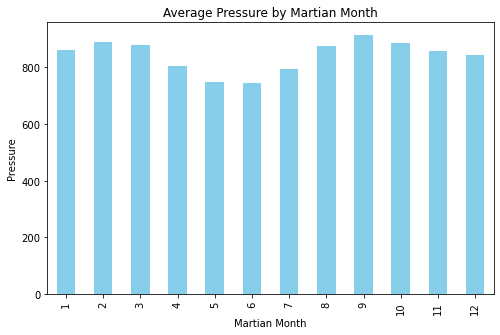

In [27]:
# Plot data with bar chart
pressure_month_plot = pressure_by_month.plot(kind='bar', figsize=(8, 5),
                                     color='skyblue')
pressure_month_plot.set_xlabel('Martian Month')
pressure_month_plot.set_ylabel('Pressure')
pressure_month_plot.set_title('Average Pressure by Martian Month')

plt.savefig('Pressure_by_Month.png')
plt.show()


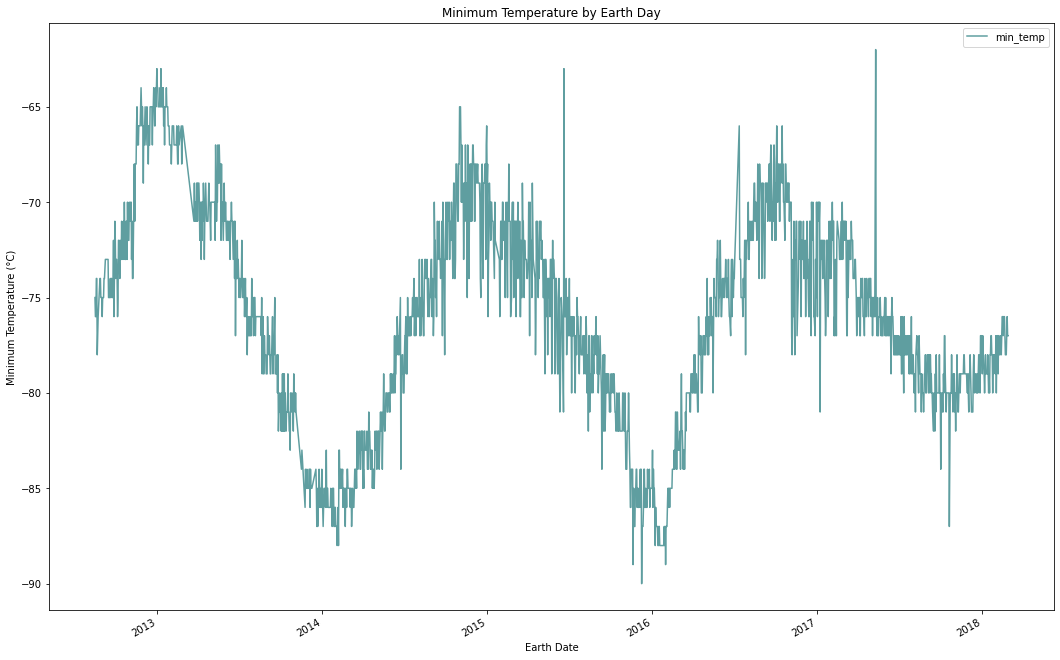

In [28]:
# How many earth days exist in a martian year?

# Plot time series with Terrestrial Date and Min Temperature; can estimate with period of resulting plot
temp_by_earth_date = mars_df.plot(x='terrestrial_date', y='min_temp', figsize=(18, 12),
                                  color='cadetblue')
temp_by_earth_date.set_xlabel('Earth Date')
temp_by_earth_date.set_ylabel('Minimum Temperature (°C)')
temp_by_earth_date.set_title('Minimum Temperature by Earth Day')

plt.savefig('Min_Temp_by_Day.png')
plt.show()

In [29]:
# Get max and min for ls (position around sun)
max_ls = mars_df['ls'].max()
min_ls = mars_df['ls'].min()

print(max_ls)
print(min_ls)

359
0


In [30]:
mars_df.to_csv('mars_data.csv', index=False)